In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive




---

## Set up of main data frame:



In [ ]:
lnames = ["AbbVie_stock.csv", "Amgen_stock.csv", "AstraZeneca_stock.csv", "BristolMyersSquibb_stock.csv", "Bayer_stock.csv", "BioNTech_stock.csv", "EliLilly_stock.csv", "GSK_stock.csv", "Gilead_stock.csv", "JNJ_stock.csv", "Merck&Co_stock.csv", "Moderna_stock.csv", "Pfizer_stock.csv", "Sanofi_stock.csv", "Takeda_stock.csv", "Zhifei_stock.csv"]

#creating empty data frame to add everything to
df=pd.DataFrame([])

#joining high column from each company into one dataframe
for i in enumerate(lnames):
  indiv_df = pd.read_csv("/content/drive/MyDrive/JSR raw data folder/"+str(i[1]))
  indiv_df['Date'] = pd.to_datetime(indiv_df['Date'])
  #inverting columns that are past-->present instead of present-->past
  if (indiv_df.iloc[0]['Date'].year < 2020):
    indiv_df=indiv_df.iloc[::-1, :]
    indiv_df=indiv_df.reset_index(drop=True)
  df[i[1][:-10]]=indiv_df['High']

#inserting in date column
df.insert(0, 'Date', indiv_df['Date'])
#df


In [ ]:
df['YEAR OCC']=df['Date'].dt.year

#only taking values during 2020-2021
df=df.loc[(df['YEAR OCC']<=2021) & (df['YEAR OCC']>=2020)]
df=df.reset_index(drop=True)
df=df.drop(axis=1, columns='YEAR OCC')

In [ ]:
#clearing rows that have any null values
df=df.dropna(how='any')

#removing dollar signs
cols = ['AbbVie',	"Amgen"	,"AstraZeneca"	,"BristolMyersSquibb",	"Bayer"	,"BioNTech",	"EliLilly",	"GSK"	,"Gilead",	"JNJ",	"Merck&Co",	"Moderna",	"Pfizer",	"Sanofi",	"Takeda","Zhifei"]
for col in cols:
  df[col]=df[col].astype(str)
  df[col]=df[col].str.replace('$','')
  df[col]=pd.to_numeric(df[col])

#df

<ipython-input-6-f9c65e40e344>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col]=df[col].str.replace('$','')


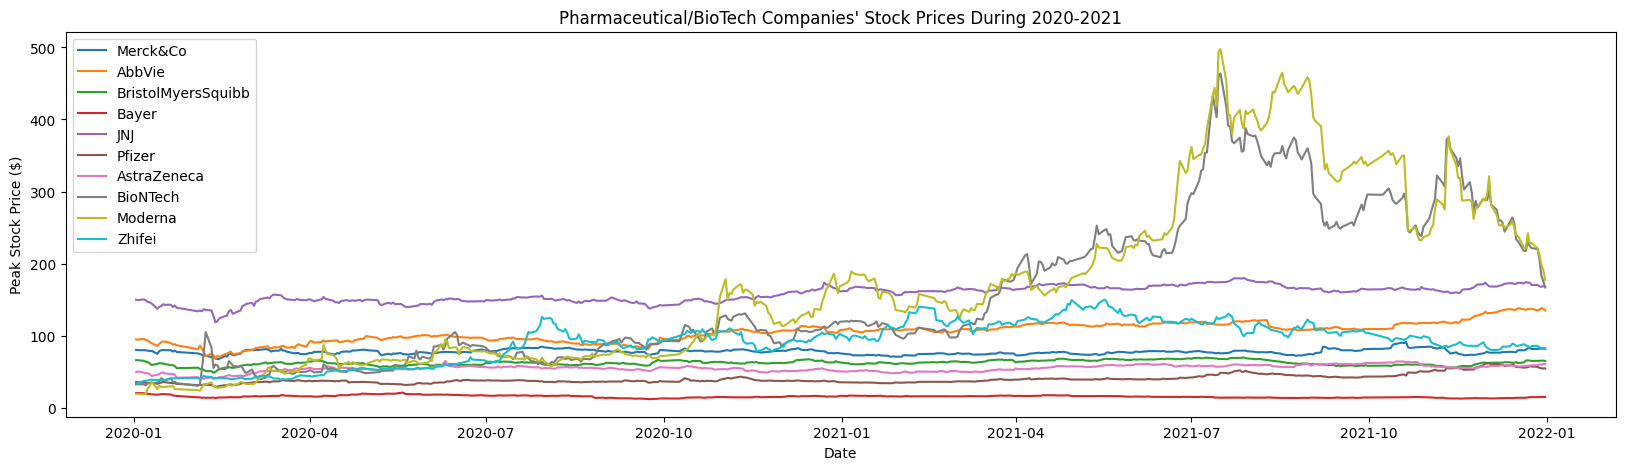

In [ ]:
#graph of all

app_cols=['Merck&Co', 'AbbVie', 'BristolMyersSquibb', 'Bayer', 'JNJ', 'Pfizer', 'AstraZeneca', 'BioNTech', 'Moderna', 'Zhifei']

all_graph = plt.figure(figsize=(20,5))
for col in app_cols:
  all_graph=sns.lineplot(x='Date', y=col, data=df, label=col)
plt.legend(loc='upper left')
all_graph.set(title="Pharmaceutical/BioTech Companies' Stock Prices During 2020-2021", xlabel='Date',ylabel='Peak Stock Price ($)')
plt.show()



---

##Basic Analysis

In [ ]:
#precovid stats:
#2020-03-11, covid pandemic announced

preCovid_df=df.loc[:'2020-03-11']
preCovid_df.describe()

#Pre-Covid average stock price
preCovid_avg = sum(preCovid_df.mean())/16
print("Pre-Covid Average Stock Price:", preCovid_avg)

#Pre-Covid average standard deviation between stock prices
preCovid_std=(sum((preCovid_df.iloc[:,1:].std())**2)/16)**.5
print("Pre-Covid Standard Deviation:", preCovid_std)

Pre-Covid Average Stock Price: 116.36001131157639
Pre-Covid Standard Deviation: 31.122380868612684


<ipython-input-8-67b20995c3ac>:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  preCovid_avg = sum(preCovid_df.mean())/16


In [ ]:
#during covid stats:
#2020-03-11 onward

#durCovid_df=df.loc['2020-03-11':]


##before Pfizer/BioNTech Vaccine (pre2020-12-11)
durCovid_df = df.loc[(df['Date'] > '2020-03-11') & (df['Date'] <= '2020-12-11')]
print("During-Covid Pre-Vaccine Average Stock Price:", sum(durCovid_df.mean())/16 )
print("During-Covid Pre-Vaccine Standard Deviation:", (sum((durCovid_df.iloc[:, 1:].std())**2)/16)**.5)

##after Pfizer/BioNTech Vaccine (post2020-12-11)
durCovid_df = df.loc[(df['Date'] > '2020-12-11')]
print("During-Covid Post-Vaccine Average Stock Price:", sum(durCovid_df.mean())/16 )
print("During-Covid Post-Vaccine Standard Deviation:", (sum((durCovid_df.iloc[:, 1:].std())**2)/16)**.5)


During-Covid Pre-Vaccine Average Stock Price: 82.05718936858108
During-Covid Pre-Vaccine Standard Deviation: 11.958946345975157
During-Covid Post-Vaccine Average Stock Price: 111.65981740321011
During-Covid Post-Vaccine Standard Deviation: 35.02155815358531


<ipython-input-31-24d2f710e8c2>:9: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print("During-Covid Pre-Vaccine Average Stock Price:", sum(durCovid_df.mean())/16 )
<ipython-input-31-24d2f710e8c2>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print("During-Covid Post-Vaccine Average Stock Price:", sum(durCovid_df.mean())/16 )




---

##Standardized Analyses Between Companies that Released a Vaccine/Didn't Release a Vaccine

<ipython-input-33-1f73d28d0127>:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  vax_z_df['Average'] = vax_z_df.mean(axis=1)


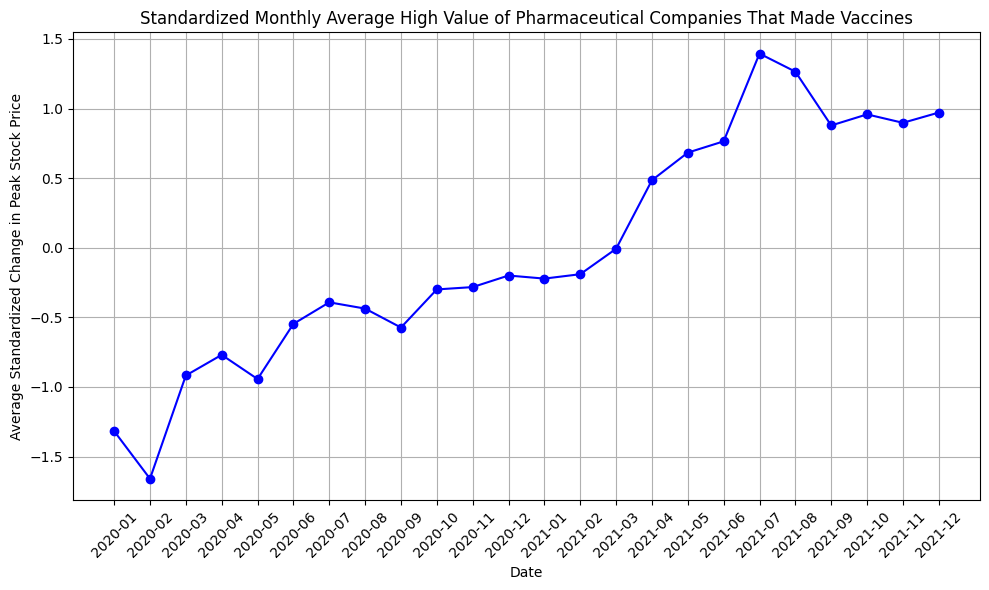

In [ ]:
#taking once per month avg of z score for vax companies

#lvax = ["AstraZeneca", "BioNTech", "JNJ", "Moderna", "Zhifei", "Pfizer"]

vax_z_df = df[['Date', 'AstraZeneca', 'BioNTech', 'JNJ', 'Moderna', 'Zhifei', 'Pfizer']].copy()
for col in vax_z_df.columns[1:]:
  vax_z_df[col]=(vax_z_df[col] - vax_z_df[col].mean())/(vax_z_df[col].std())


vax_z_df['Average'] = vax_z_df.mean(axis=1)
vax_z_df.head()


# Drop individual company columns to keep only the 'Date' and 'Average' columns
vax_z_df.drop(vax_z_df.iloc[:, 1:-1], axis=1, inplace=True)
vax_z_df['Date'] = pd.to_datetime(vax_z_df['Date'])
vax_z_df.set_index('Date', inplace=True)

monthly_avg_vax_z_df = vax_z_df.resample('M').mean()

# Display the resulting DataFrame
monthly_avg_vax_z_df.index = monthly_avg_vax_z_df.index.strftime('%Y-%m')
monthly_avg_vax_z_df = monthly_avg_vax_z_df.loc['2019-12-31':]

#vax_monthly_avg_z = monthly_avg_z_df

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_vax_z_df.index, monthly_avg_vax_z_df['Average'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Standardized Change in Peak Stock Price')
plt.title('Standardized Monthly Average High Value of Pharmaceutical Companies That Made Vaccines')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-34-9d4135b17dac>:9: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  nvax_z_df['Average'] = nvax_z_df.mean(axis=1)


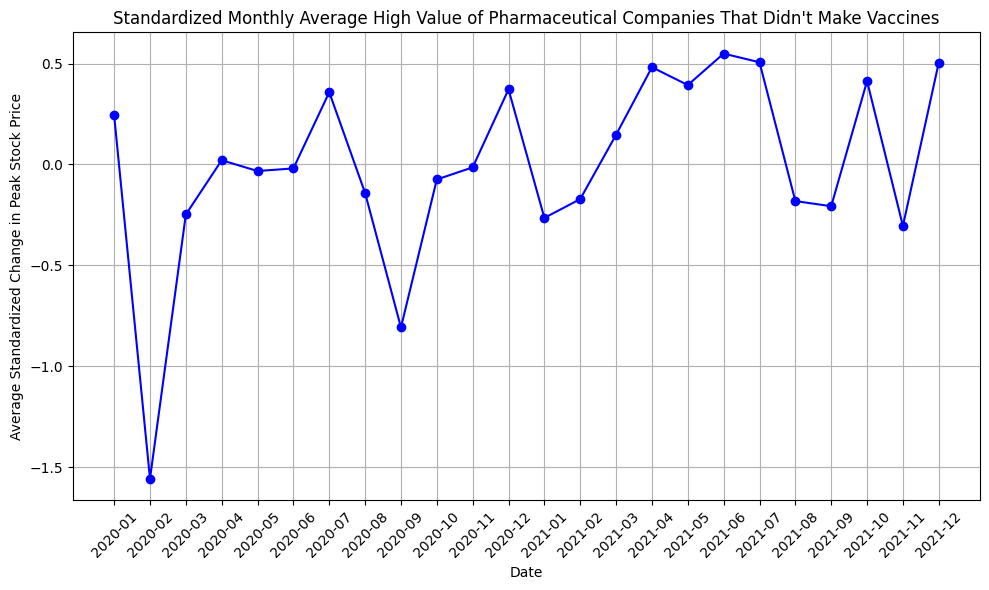

In [ ]:
#taking once per month avg of z score for non-vax companies


nvax_z_df = df[['Date', 'AbbVie', 'BristolMyersSquibb', 'Bayer', 'Merck&Co']].copy()
for col in nvax_z_df.columns[1:]:
  nvax_z_df[col]=(nvax_z_df[col] - nvax_z_df[col].mean())/(nvax_z_df[col].std())


nvax_z_df['Average'] = nvax_z_df.mean(axis=1)
nvax_z_df.head()


# Drop individual company columns to keep only the 'Date' and 'Average' columns
nvax_z_df.drop(nvax_z_df.iloc[:, 1:-1], axis=1, inplace=True)
nvax_z_df['Date'] = pd.to_datetime(nvax_z_df['Date'])
nvax_z_df.set_index('Date', inplace=True)

monthly_avg_nvax_z_df = nvax_z_df.resample('M').mean()

# Display the resulting DataFrame
monthly_avg_nvax_z_df.index = monthly_avg_nvax_z_df.index.strftime('%Y-%m')
monthly_avg_nvax_z_df = monthly_avg_nvax_z_df.loc['2019-12-31':]

#novax_monthly_avg_z = monthly_avg_z_df

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_nvax_z_df.index, monthly_avg_nvax_z_df['Average'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Standardized Change in Peak Stock Price')
plt.title('Standardized Monthly Average High Value of Pharmaceutical Companies That Didn\'t Make Vaccines')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

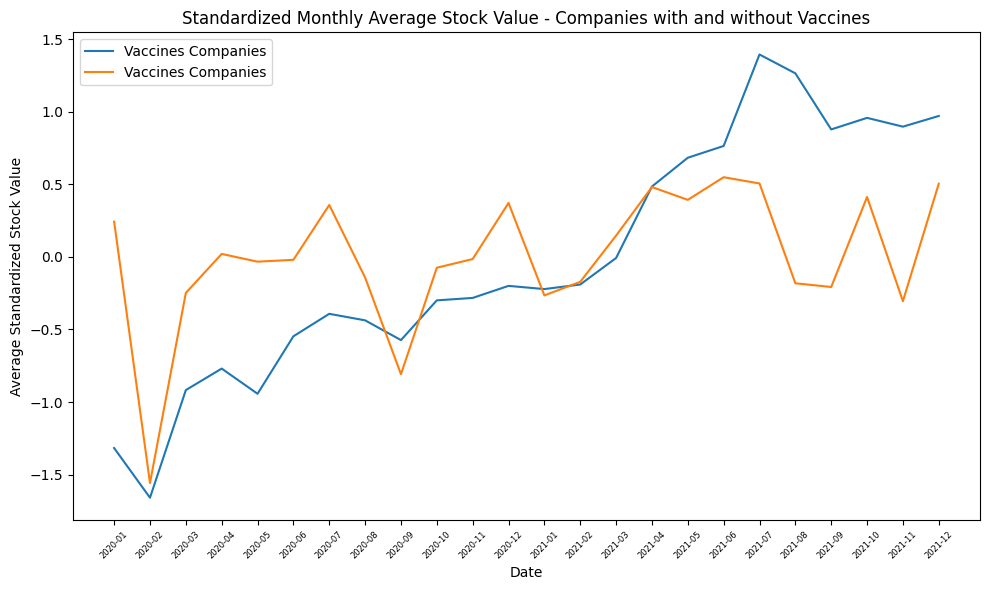

In [ ]:
#vax and non vax companies on same graph (line)

plt.figure(figsize=(10, 6))

plt.plot(monthly_avg_vax_z_df.index, monthly_avg_vax_z_df['Average'], label='Vaccines Companies')
plt.plot(monthly_avg_vax_z_df.index, monthly_avg_nvax_z_df['Average'], label='Vaccines Companies')


plt.xlabel('Date')
plt.ylabel('Average Standardized Stock Value')
plt.title('Standardized Monthly Average Stock Value - Companies with and without Vaccines')

plt.legend()

plt.xticks(rotation=45)
plt.xticks(fontsize=6)

plt.tight_layout()
plt.show()


-0.33620874902572334 0.026766864399372862


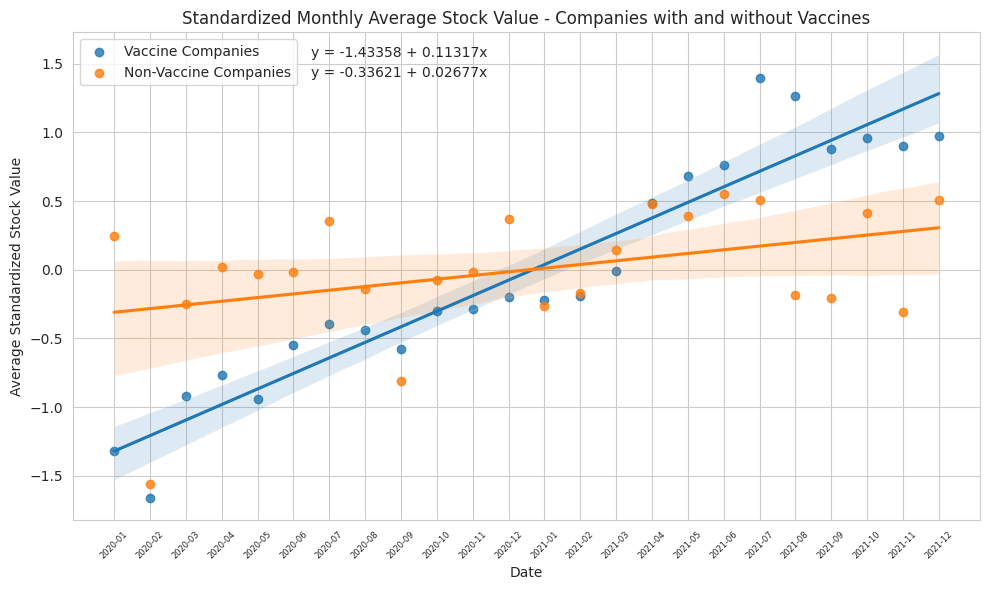

In [ ]:
#vax and non vax companies on same graph (scatter + regression)
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# plt.scatter(monthly_avg_vax_z_df.index, monthly_avg_vax_z_df['Average'], label='Vaccines Companies')
# plt.scatter(monthly_avg_vax_z_df.index, monthly_avg_nvax_z_df['Average'], label='Vaccines Companies')

monthly_avg_vax_z_df['MONTH NUM'] = np.arange(1, 25)
v_eqn = sns.regplot(x='MONTH NUM', y='Average', data=monthly_avg_vax_z_df, label="Vaccine Companies")
slope1, intercept1, r1, v_eqn, sterr1 = sp.stats.linregress(x=v_eqn.get_lines()[0].get_xdata(), y=v_eqn.get_lines()[0].get_ydata())


plt.text(6.5, 1.55, 'y = ' + str(round(intercept1,5)) + ' + ' + str(round(slope1,5)) + 'x')


monthly_avg_nvax_z_df['MONTH NUM'] = np.arange(1, 25)


nv_eqn = sns.regplot(x='MONTH NUM', y='Average', data=monthly_avg_nvax_z_df, label="Non-Vaccine Companies")



slope2, intercept2, r2, nv_eqn, sterr2 = sp.stats.linregress(x=nv_eqn.get_lines()[1].get_xdata(), y=nv_eqn.get_lines()[1].get_ydata())

plt.text(6.5, 1.4, 'y = ' + str(round(intercept2,5)) + ' + ' + str(round(slope2,5)) + 'x')


# FIX BOTH EQUATIONS BEING THE SAME

plt.legend()

plt.xlabel('Date')
plt.ylabel('Average Standardized Stock Value')
plt.title('Standardized Monthly Average Stock Value - Companies with and without Vaccines')


plt.xticks(np.arange(1, 25), monthly_avg_vax_z_df.index, rotation=45, fontsize=6)


plt.tight_layout()
plt.show()



---

##Non-Standardized Analyses

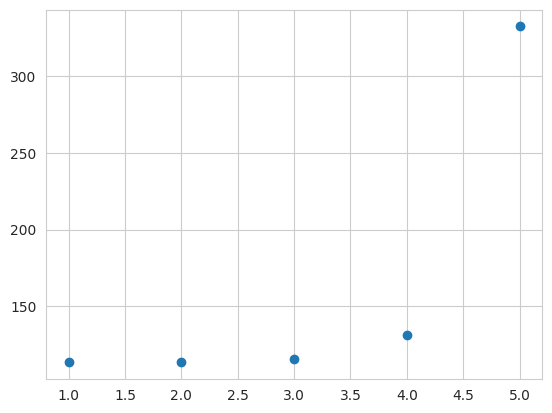

In [ ]:
#BioNTech_post_release = df['BioNTech'].iloc['2020-12-11':'2021-01-11']['Average'].mean()

# pfizer_post_release = pfizer_monthly_avg_df['2020-12-11':'2021-01-11']['Average'].mean()
# astraZeneca_post_release = astraZeneca_monthly_avg_df['2020-12-30':'2021-01-30']['Average'].mean()
# jnj_post_release = jnj_monthly_avg_df['2021-02-27':'2021-03-27']['Average'].mean()
# Moderna_post_release = Moderna_monthly_avg_df['2021-08-09':'2021-09-09']['Average'].mean()

BioNTech_post_release = (df.loc[(df['Date']<='2021-01-11') & (df['Date']>='2020-12-11')])['BioNTech'].mean()
Pfizer_post_release = (df.loc[(df['Date']<='2021-01-11') & (df['Date']>='2020-12-11')])['BioNTech'].mean()
AstraZeneca_post_release = (df.loc[(df['Date']<='2021-01-30') & (df['Date']>='2020-12-30')])['BioNTech'].mean()
JNJ_post_release = (df.loc[(df['Date']<='2021-03-27') & (df['Date']>='2021-02-27')])['BioNTech'].mean()
Moderna_post_release = (df.loc[(df['Date']<='2021-09-09') & (df['Date']>='2021-08-09')])['BioNTech'].mean()

lPostRelease = [BioNTech_post_release, Pfizer_post_release,AstraZeneca_post_release, JNJ_post_release, Moderna_post_release]
plt.plot(np.arange(1,6), lPostRelease, 'o')
plt.show()

---
### MISC


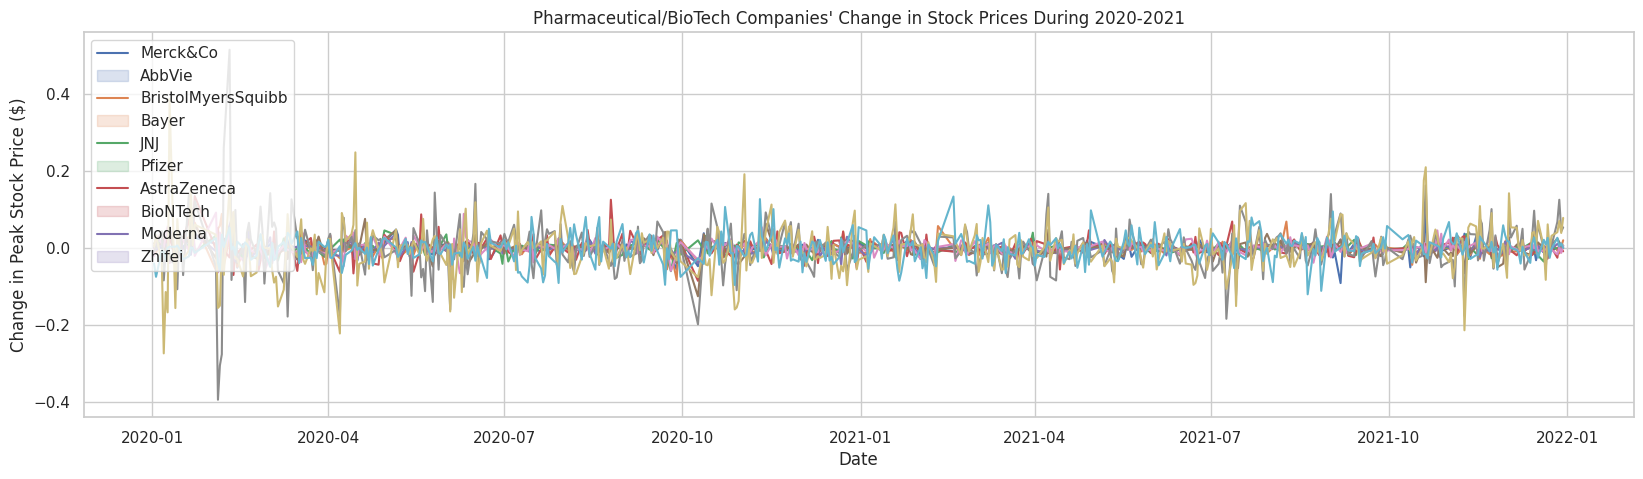

In [ ]:
#percent increases/decreases dataframe
pct_df=pd.DataFrame([])
pct_df['Date']=df['Date'].copy()
for col in cols:
  pct_df[col]=df[col].pct_change()

pct_df=pct_df.dropna()
pct_df

#percentage graph
pct_all_graph = plt.subplots(figsize=(20,5))
for col in app_cols:
  pct_all_graph=sns.lineplot(x='Date', y=col, data=pct_df)
plt.legend(loc='upper left', labels=app_cols)
pct_all_graph.set(title="Pharmaceutical/BioTech Companies' Change in Stock Prices During 2020-2021", xlabel='Date',ylabel='Change in Peak Stock Price ($)')
plt.show()

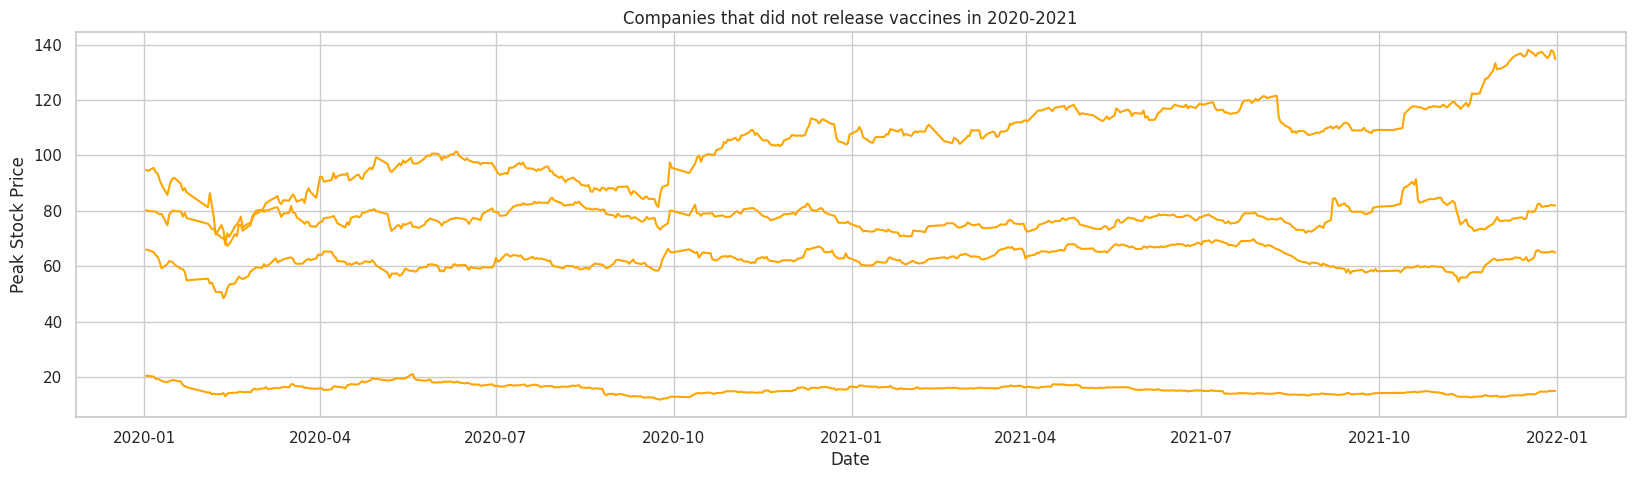

In [ ]:
novax_df = df[['Date', 'Merck&Co', 'AbbVie', 'BristolMyersSquibb', 'Bayer']].copy()
vax_df = df[['Date', 'JNJ', 'Pfizer', 'AstraZeneca', 'BioNTech', 'Moderna', 'Zhifei']].copy()

nonvax = plt.subplots(figsize=(20,5))
nonvax = sns.lineplot(x='Date', y='Merck&Co', data=novax_df, color='orange')
nonvax = sns.lineplot(x='Date', y='AbbVie', data=novax_df, color='orange')
nonvax = sns.lineplot(x='Date', y='BristolMyersSquibb', data=novax_df, color='orange')
nonvax = sns.lineplot(x='Date', y='Bayer', data=novax_df, color='orange')

nonvax.set(title="Companies that did not release vaccines in 2020-2021", xlabel='Date',ylabel='Peak Stock Price')



plt.show()
